<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Practice Loading and Describing Data 

_Authors: Matt Brems (DC)_

---

In this lab you will practice loading data using python and describing it with statistics.

It might be a good idea to first check the [source of the Boston housing data](https://archive.ics.uci.edu/ml/datasets/Housing).

### 1. Load the boston housing data (provided below)

The data file does not contain the column names in the first line, so we'll need to add those in manually. You can find the names and explanations [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). We've extracted the names below for your convenience. You may choose to edit the names, should you decide it would be more helpful to do so.

In [2]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
         "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [16]:
# 1. CRIM      - per capita crime rate by town
# 2. ZN        - proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. INDUS     - proportion of non-retail business acres per town
# 4. CHAS      - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# 5. NOX       - nitric oxides concentration (parts per 10 million)
# 6. RM        - average number of rooms per dwelling
# 7. AGE       - proportion of owner-occupied units built prior to 1940
# 8. DIS       - weighted distances to five Boston employment centres
# 9. RAD       - index of accessibility to radial highways
# 10. TAX      - full-value property-tax rate per 10,000 dollars. 
# 11. PTRATIO  - pupil-teacher ratio by town
# 12. B        - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# 13. LSTAT    - Percent lower status of the population
# 14. MEDV     - Median value of owner-occupied homes in $1000's

### 2. Load the `housing.data` file with python

Using any method of your choice.
> _**Hint:** despite this file having a strange `.data` extension, using python's `open() as file` and `file.read()` or `file.readlines()` we can load this in and see that it is a text file formatted much the same as a CSV. You can use string operations to format the data._

In [3]:
# Reading in the local file 'housing.data'
data = []
with open('../datasets/housing.data', 'rU') as f:
    rows = f.readlines()
    for row in rows:
        row = [float(x) for x in row.split()]
        data.append(row)
f.close()

In [4]:
# look at the first two rows:
data[0:2]

[[0.00632,
  18.0,
  2.31,
  0.0,
  0.538,
  6.575,
  65.2,
  4.09,
  1.0,
  296.0,
  15.3,
  396.9,
  4.98,
  24.0],
 [0.02731,
  0.0,
  7.07,
  0.0,
  0.469,
  6.421,
  78.9,
  4.9671,
  2.0,
  242.0,
  17.8,
  396.9,
  9.14,
  21.6]]

In [5]:
# put the data into a dictionary with keys identified by column names:
d = {key_name:[row[index] for row in data] for index, key_name in enumerate(names)}

In [7]:
# first ten values in the 'NOX' key
d['NOX'][:10]

[0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524, 0.524]

In [9]:
print d.keys()

['CRIM', 'ZN', 'B', 'LSTAT', 'AGE', 'TAX', 'RAD', 'CHAS', 'NOX', 'MEDV', 'RM', 'INDUS', 'PTRATIO', 'DIS']


### 3.  Conduct a brief integrity check of your data. 

This integrity check should include, but is not limited to, checking for missing values and making sure all values make logical sense. (i.e. is one variable a percentage, but there are observations above 100%?)

Summarize your findings in a few sentences, including what you checked and, if appropriate, any 
steps you took to rectify potential integrity issues.

_**Not sure what to look for or where to start?**  _

**Value Integrity**  
A couple of our features, such as `CHAS`, `ZN` and `PTRATIO`, exist on a normalized scale(0-1 or 0-100).  We can iterate through these features and make sure all their associate values are within their respective scales.

**Equal observations**  
All of our features should have an equal length/ number of observations in them.

In [17]:
# Checking for features with improperly recorded observations:
    
# Given the information about the features and observing a few of their 
# observations I believe there are 7 features which take place on a 
# normalized scale (0-1 or 0-100)

# - CHAS (0-1),
# - CRIM(0-100),
# - ZN(0-100), 
# - INDUS(0-100), 
# - RM(0-100), 
# - LSTAT(0-100), 
# - PTRATIO(0-100)

In [10]:
max_one = ['CHAS']
max_hund = ['ZN','INDUS','RM','LSTAT','PTRATIO', 'CRIM']

In [17]:
# goes through all features with a max of one and then all values within said feature
for feature in max_one:
    for observation in d[feature]:
        if observation > 1 or observation < 0:n # compares to see is any features are outside the normal range 
            print 'Abnormal Value found in ', feature, 'with value of', observation
# if nothing is returned than nothing unusual was found.


In [18]:
# goes through all features with a max of one-hundred and then all values within said feature
for feature in max_hund:
    for observation in d[feature]:
        if observation > 100 or observation < 0: # compares to see is any features are outside the normal range 
            print 'Abnormal Value found in ', feature, 'with value of', observation
# Also returned no values

In [31]:
# printing how many features we should have
print 'Number of Expected Features: ' + str(len(names))

# printing how many features we do have (keys)
print 'Number of Actual Features: ' + str(len(d.keys()))

# prints the lengths of all the value lists in the dictionary
for key, data in d.iteritems():
    print "%d rows in %s" % (len(data), key)

Number of Expected Features: 14
Number of Actual Features: 14
506 rows in CRIM
506 rows in ZN
506 rows in B
506 rows in LSTAT
506 rows in AGE
506 rows in TAX
506 rows in RAD
506 rows in CHAS
506 rows in NOX
506 rows in MEDV
506 rows in RM
506 rows in INDUS
506 rows in PTRATIO
506 rows in DIS


 _There is no missing data and there are no other data integrity issues that we checked for._

### 4. For what two attributes does it make the *least* sense to calculate mean and median? Why?


**Potential Solution: **_The dummy variable `CHAS` and the categorical variable `RAD`. _
- `CHAS` is a dummy (categorical) variable that makes no sense quantitatively. 
- `RAD` is a variable that indexes the distance to highways. It has many low values and, after a large gap, has higher values. It stands to reason that this is not a "_true_" quantitative variable in the sense that the difference between `RAD = 1` and `RAD = 2` may not be the same as the difference between `RAD = 2` and `RAD = 3`.

### 5. Build a function that takes a feature as an input an returns the following calculated by hand (don't use any libraries)!

- Mean
- Median
- Standard Deviation
- Variance

Run your function on several (or all) of the features.  Report any intereseting findings.

_`math.sqrt` is allowed._

In [32]:
import math.sqrt

def summary(feature):
    # mean of feature
    f_mean = sum(feature)/len(feature)
    
    # sorting features for median
    feat_sort = sorted(feature)
    # if feature observation count is even
    if len(feature)%2 == 0:
        m1 = len(feature)/2
        m2 = m1-1
        f_med = (feat_sort[m1]+feat_sort[m2])/2.0
    # if feature observation count is odd
    else:
        f_med = feat_sort[(len(feature)/2)]
    
    # variable for residuals
    residual_squares =[]
    for item in feature: # calculate difference of mean and observation
        residual_squares.append((f_mean-item)**2) # append the squared difference
    f_var = sum(residual_squares)/len(feature)
    
    # standard dev = square root of variance
    f_std = math.sqrt(f_var)
    
    # print output    
    print f_mean
    print f_med
    print f_var
    print f_std
    

In [33]:
summary(d['NOX'])

0.554695059289
0.538
0.0134010988886
0.115763115407


#### 5.a Check the results of your equation against numpy.
`np.mean(), np.median(), np.std(), np.var()`

In [36]:
def summary2(feature):
    print np.mean(feature)
    print np.median(feature)
    print np.std(feature)
    print np.var(feature)
summary2(d['NOX'])

0.554695059289
0.538
0.115763115407
0.0134010988886


### 6. Which two variables have the strongest linear association? 

<img src="../assets/images/correlation.png" width="600">

Report both variables, the metric you chose as the basis for your comparison, and the value of that metric.  You can use Numpy's [`np.corrcoef`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.corrcoef.html) to calculate the Pearson R Correlation Coefficient. 
*(Hint: Make sure you consider only variables for which it makes sense to find a linear association.)*

In [34]:
import numpy as np

relationships = []

# Choosing to use the pearson correlation coefficient, "np.corrcoef":
for name in d.keys():
    # do not consider RAD or CHAS:
    if name not in ['RAD','CHAS']:
        for other in d.keys():
            if (name != other) and (other not in ['RAD','CHAS']):
                relationships.append([name, other, np.corrcoef(d[name], d[other])[0,1]])


In [35]:
sort_rel = sorted(relationships, key=lambda x: np.abs(x[2]), reverse=True)

In [36]:
for i in range(5):
    print sort_rel[i]

['NOX', 'DIS', -0.76923011322582779]
['DIS', 'NOX', -0.76923011322582779]
['NOX', 'INDUS', 0.76365144692091469]
['INDUS', 'NOX', 0.76365144692091469]
['AGE', 'DIS', -0.74788054086863187]


**Solution:** _`NOX` (Nitric Oxides Concentration) and `DIS` (Weighted Distances to Five Boston Employment Centers)have the strongest _linear_ association. The correlation between NOX and DIS is -0.76923._

### 7. Look at distributional qualities of variables.

<img src="../assets/images/distributions.jpg" width="500">

Answer the following questions:
1. Which variable has the most symmetric distribution? 
    - *Symmetric: the metric with the smallest abs(mean - median)*
2. Which variable has the most left-skewed (negatively skewed) distribution? 
    - *Left: the metric with the smallest mean - median*
3. Which variable has the most right-skewed (positively skewed) distribution? 
    - *Right: the metric with the largest mean - median*
    
Defend your method for determining this.

In [ ]:
# Symmetric: the metric with the smallest abs(mean - median)
# Left: the metric with the smallest mean - median
# Right: the metric with the largest mean - median

# list comprehension to calculate all the abs difference of mean and median.  then sorts and provides 1 index
symmetric = sorted([[key_name, np.abs(np.mean(values) - np.median(values))] for key_name,values in d.items()],
                   key=lambda x: x[1])
print 'Symmetric:', symmetric[0]

left = sorted([[k, np.mean(v) - np.median(v)] for k,v in d.items()],
              key=lambda x: x[1])
print 'Left:', left[0]

right = sorted([[k, np.mean(v) - np.median(v)] for k,v in d.items()],
               key=lambda x: x[1], reverse=True)
print 'Right:', right[0]

**When it comes to assessing distributions normalizing and scaling is wildly important when looking at the true distributions of the data.**

### Optional: Repeat question 7 but scale the variables by their range first.

Scale = $\sigma - \widetilde{x} \over max_x - min_x$  

Where
- Mean x = $\sigma$  
- Median x = $\widetilde{x}$  
- Maximum value in x = $max_x$  
- Minimum value in x = $min_x$  

As you may have noticed, the spread of the distribution contributed significantly to the results in question 6.

In [42]:
def scaled_diff(v):
    return (np.mean(v) - np.median(v))/np.ptp(v)

# same equations as above just one the sorted values.
symmetric = sorted([[k, np.abs(scaled_diff(v))] for k,v in d.items()],
                   key=lambda x: x[1])
print 'Symmetric:', symmetric[0]

left = sorted([[k, scaled_diff(v)] for k,v in d.items()],
              key=lambda x: x[1])
print 'Left:', left[0]

right = sorted([[k, scaled_diff(v)] for k,v in d.items()],
               key=lambda x: x[1], reverse=True)
print 'Right:', right[0]

Symmetric: ['RM', 0.01458792629848224]
Left: ['AGE', -0.091916568632638973]
Right: ['RAD', 0.19780030933150025]


### 8. Have you been using inferential statistics, descriptive statistics, or both?

For each exercise, identify the branch of statistics on which you relied for your answer.

**Solution:** _For all exercises, we relied only on descriptive statistics._

## Population vs. Sample

A population is a **whole** group from which a sample is taken.  Generally speaking it is extremely unlikely that you will ever get a perfect populations worth of data so you will have to settle for sampling.  Up untill this point we have assumed that this data **IS** a population.  

While this may not seem like a big deal, there are slight adjustments to the way descriptive statistics are counted.  In fact, *Statistics* are used describe samples and *Parameters* are used to describe populations because they are suppose to be the absolute values of a population.

Lets randomly sample our data to create a sample of the population.

### 9. Reducing the number of observations

It seems likely that this data is a census - that is, the data set includes the entire target population. Suppose that the 506 observations was too much for our computer (as unlikely as this might be) and we needed to pare this down to fewer observations. 

**9.A Use the `random.sample()` function to select 50 observations from `'AGE'`.**

([This documentation](https://docs.python.org/2/library/random.html) may be helpful.)

In [39]:
age = d['AGE']

import random

age_sample = random.sample(age, 50)

In [40]:
print len(age_sample)

50


**9.B Identify the type of sampling we just used.**

---
**Solution:** _Simple random sampling was used._  

---

#### 9c. Assess how representative your sample is of the population by comparing the Variance and Standard Deviation of your sample to that of the populations.

- It is important to know that Sample measures of spread are calculate with a slight difference from population measures of spread.

Population Variance = $\sum (x_i - \bar{x})^2  \over n $  

Sample Variance = $\sum (x_i - \bar{x})^2  \over (n-1) $  



We divide by $n-1$ to reduce the bias of our sample statistic there for more representative of the true variance of the population.  *In **any** calculation* where we divide by $n$, the calculation for a sample replaces $n$ with $n-1$.

### 10. Simple Linear regression model.

- Lets build a model that uses one of our variables to predict another.
- Once its built we will use the coefficient of determination r2 to assess the error of our models predictions.

#### 10a. Choose 2 variables to build your model and assign them to x or y
_Using our solution from Q6 `'INDUS'` and `'NOX'` have a decent correlation._


In [48]:
# predictor
x = d['NOX']
# target
y = d['INDUS']

#### 10b. We can all remember the formula for a line being $y = mx +b$.  But how do we find the slope($m$) and the y-int($b$)?

### $ m = \frac{Cov(x,y)}{Var(x)} $

_ Slope is equal to the covariance over variance._

### $ b = \bar{y} - (m*\bar{x})$

_ Y intercept is the difference between the mean of y and the product of the slope and the mean of x_


You can use [`np.var`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html) to calculate the variance of $x$ and [`np.cov`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) to calculate the covariance of $x$ and $y$.

_Note: The `np.cov` returns a matrix of all possible covariances (x,x),(x,y) & (y,y).  Use `np.cov(x,y)[0][1]` to extract the covariance output of x and y._

In [56]:
# slope
m = (np.cov(x,y)[0][1])/(np.var(x))

# y int
b = np.mean(y) - (m*np.mean(x))

#equation
print 'y = %fx %f' %(m,b)

y = 45.300292x -13.991070


#### 10c. Use your found slope and y intercept to make a prediction on your original x array.  
- Call the output `"y_pred"`.

In [57]:
y_pred = []
# making a prediction using the formula
for item in x:
    pred = 45.300292*(item)-13.991070
    y_pred.append(pred)

#### 10d. If yor variables are labelled `x`, `y` and `y_pred`, you should be able to run the below.

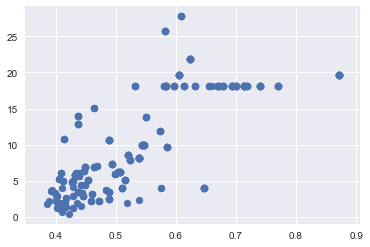

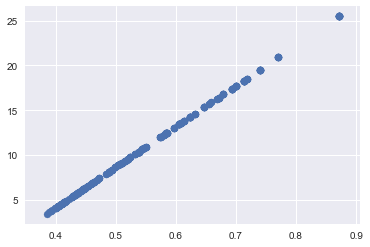

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# x vs y scatter plot
plt.scatter(x,y)
plt.show()

# X predicting y value
plt.scatter(x,y_pred)
plt.show()

#### 10e. Calculate the Coefficient of Determination R2 (R-Squared)
The formula for R2 is 1 minus the quotient of the Residual Sum of Squares and the Total Sum of Squares. 
While R2 can be used to generalize the relationship, it is actually a loss metric to evaluate the linear regression being used to explain our variables regression. To put this in a more mathmatical perspective "How much of the variance of our data is explained with our linear regression"

$$ r2 = 1 - \frac {RSS} {TSS} $$

**Residual Sum of Squares** is a calculation of how off our predictions are from the true value.  Minimulzing this value will cause the calculate of RSS over TSS to decrease thus creating an higher R2 score.

_Residual is is basically the difference between what was predicted and what is true._

 $$ RSS =\sum\limits_{i} (y_i - \widehat{y}  )^2$$

- $y_i$ : Y True
- $\widehat{y}$ : Y pred

**Total sum of squares.**  This is the variance of true vs pred if we only predicted using the mean of y.  In some ways we can expect this to be the worse predicting model we can create.  This prediction also considered the baseline in many situations.

 $$ TSS=\sum\limits_{i} (y_i - \bar{y}  )^2 $$

- $y_i$ : Y True
- $\bar{y}$ : Mean of all Ys


The value of R2 exists on a scale of 1 to negative infinity. Predicting the mean for all values of Y(default model) would create a R2 of 0.  Any R2 less than zero indicates the model (regression) explains less of the variance than the default model. 

#### Calcluate the Residual Sum of Squares (RSS)

In [63]:
# sum difference of ys using the zip method to simultaneously iterate over 2 lists
rss = sum((y_t - y_p)**2 for y_t, y_p in zip(y,y_pred))


9907.233204294365

#### Calcluate the Total Sum of Squares (TSS)

In [66]:
y_mean = np.mean(y)
tss = sum((y_t - y_mean)**2 for y_t in y )
tss

23767.543449209421

#### Calcluate the Coefficient of Determination (R2)

In [67]:
r2 = 1 - (rss/tss)
r2

0.5831612456934876